In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.regularizers import l2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# with open('encoded.pkl', 'rb') as file:
#     shotlog=pickle.load(file)
with open('shotlog.pkl','rb') as file:
    shotlog=pickle.load(file)

print(type(shotlog))
first_column=shotlog.pop('SHOT_RESULT')
shotlog.insert(0,'SHOT_RESULT',first_column)

/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>


In [2]:
print(shotlog.describe())

         SHOT_RESULT       GAME_ID       LOCATION              W  \
count  128069.000000  1.280690e+05  128069.000000  128069.000000   
mean        0.452139  2.140045e+07       0.499215       0.504377   
std         0.497706  2.578773e+02       0.500001       0.499983   
min         0.000000  2.140000e+07       0.000000       0.000000   
25%         0.000000  2.140023e+07       0.000000       0.000000   
50%         0.000000  2.140045e+07       0.000000       1.000000   
75%         1.000000  2.140067e+07       1.000000       1.000000   
max         1.000000  2.140091e+07       1.000000       1.000000   

        FINAL_MARGIN    SHOT_NUMBER     GAME_CLOCK     SHOT_CLOCK  \
count  128069.000000  128069.000000  128069.000000  128069.000000   
mean        0.208723       6.506899     351.393811      17.932493   
std        13.233267       4.713260     207.590603      51.834789   
min       -53.000000       1.000000       0.000000       0.000000   
25%        -8.000000       3.000000     17

In [3]:
fgmean=shotlog['EFG'].mean()
shotlog['EFG'].fillna(value=fgmean, inplace=True)
dfgmean=shotlog['DEFG'].mean()
shotlog['DEFG'].fillna(value=dfgmean,inplace=True)
shotlog=shotlog.drop(['CLOSEST_DEFENDER_PLAYER_ID','FINAL_MARGIN','W','LOCATION','player field goal percentage','Defender Field goal Percentage against'],axis=1)

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_6939/991535532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shotlog['EFG'].fillna(value=fgmean, inplace=True)
/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_6939/991535532.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [4]:
Scaler=StandardScaler()

X=shotlog.values[:,1:]
y=shotlog['SHOT_RESULT']
X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.4, random_state=42)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
Y_train=Y_train.astype('float32')
Y_test=Y_test.astype('float32')

X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

overlap = np.intersect1d(X_train, X_test)
print(len(overlap))  

X_base,X_final,Y_base,Y_final=train_test_split(X_train,Y_train, test_size=0.25, random_state=42)

3


In [5]:
input_shape=[X_train.shape[1]]
model=tf.keras.Sequential([
tf.keras.layers.Dense(units=32, activation='relu', input_shape=(12,)),
Dense(32, activation='relu',kernel_regularizer=l2(0.01)),
Dropout(0.3),
tf.keras.layers.Dense(units=16, activation='sigmoid'),
tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()

/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,017 (7.88 KB)

 Trainable params: 2,017 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
validation=model.fit(X_train,Y_train, validation_data=(X_final, Y_final), batch_size=100, epochs=30)

Epoch 1/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8759 - loss: 0.4525 - val_accuracy: 1.0000 - val_loss: 0.0206
Epoch 2/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 3/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 4/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 9.7274e-04
Epoch 7/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.7588e-04
Epoch 8/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 8.272

<Axes: >

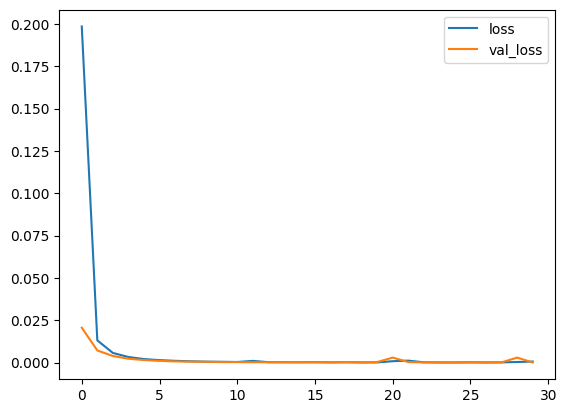

In [8]:
losses_df=pd.DataFrame(validation.history)

losses_df.loc[:,['loss','val_loss']].plot()

In [9]:
trainer=model.fit(X_train, Y_train, validation_data=(X_base, Y_base), batch_size=100, epochs=30)

Epoch 1/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.2372e-05 - val_accuracy: 1.0000 - val_loss: 1.5553e-05
Epoch 2/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 1.0000 - loss: 4.3998e-05 - val_accuracy: 1.0000 - val_loss: 3.2539e-05
Epoch 3/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.0626e-05 - val_accuracy: 1.0000 - val_loss: 3.8440e-05
Epoch 4/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.4306e-05 - val_accuracy: 1.0000 - val_loss: 1.3772e-05
Epoch 5/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.5967e-05 - val_accuracy: 1.0000 - val_loss: 9.3871e-06
Epoch 6/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.1185e-04 - val_accuracy: 1.0000 - val_loss: 6.1685e-05
Epoch 7/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 1.0000 - loss: 1.8067e-04 - val_accuracy: 1.0000 - val_loss: 1.2360e-05
Epoch 8/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 1s 9

In [10]:
Y_train.value_counts()

SHOT_RESULT
0.0    42199
1.0    34642
Name: count, dtype: int64

<Axes: >

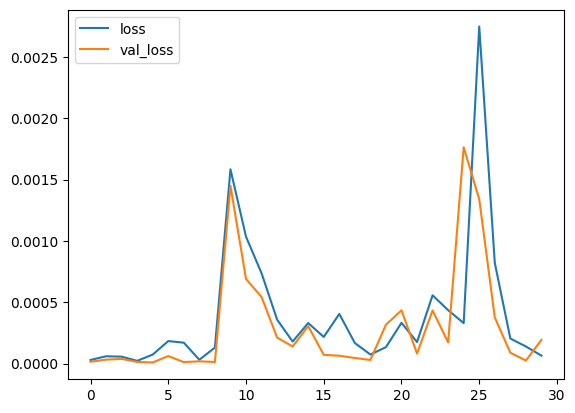

In [11]:
losses_df=pd.DataFrame(trainer.history)

losses_df.loc[:,['loss','val_loss']].plot()